# Regression Models Complexity Curves (Ames, Iowa Housing)¶

### Lodaing, Splitting and Scaling the data

In [1]:
cd ..

/home/jovyan/04-Final


In [2]:
run __init__.py

In [3]:
%run src/load_data.py

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from tqdm import tqdm
from time import time

In [6]:
train_data =  data['ames']['train']['engineered']
train_labels = data['ames']['train']['labels']
test_data =  data['ames']['test']['engineered']
test_labels = data['ames']['test']['labels']

### Using the following models with range of parameters to fit the data

In [7]:
models = {
    'Ridge' : linear_model.Ridge(),
    'Lasso' : linear_model.Lasso(),
    'K Nearest Neighbors' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Support Vector Machines' : SVR(kernel ='linear'),
}

### Complexity curve for $R^2$ scores against hyper-parameters

In [8]:
def time_function_call(function):
    def wrapper(*args, **kwargs):
        start = time()
        result = function(*args, **kwargs)
        execution_time = time() - start
        return result, execution_time
    return wrapper

@time_function_call
def model_fit(model, X, y):
    return model.fit(X, y)

@time_function_call
def model_predict(model, X):
    return model.predict(X)

def run_model(model, model_name, X_train, y_train, X_test, y_test):

    _, fit_time = model_fit(model, X_train, y_train)
    
    train_pred, train_pred_time = model_predict(model, X_train)
    
    test_pred, test_pred_time = model_predict(model, X_test)   
    
    return {
            'model' : model,
            'model_name' : model_name,
            'train_score' : model.score(X_train, y_train),
            'test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

### Ridge Regression

In [9]:
test_results = []
alpha_values = range(1,500)
for ap in tqdm(alpha_values):
    model = linear_model.Ridge(alpha=ap)
    test_result = run_model(model,
                            'Ridge',
                            train_data, 
                            train_labels,
                           test_data,
                           test_labels)
    test_results.append(test_result)

100%|██████████| 499/499 [00:14<00:00, 34.87it/s]


In [10]:
test_results_df = pd.DataFrame(test_results)
test_results_df['alpha'] = test_results_df.model.apply(lambda model: model.alpha)

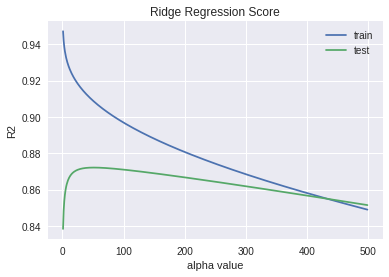

In [11]:
plt.plot(test_results_df.alpha, test_results_df.train_score, label='train')
plt.plot(test_results_df.alpha, test_results_df.test_score, label='test')
plt.title('Ridge Regression Score')
plt.ylabel('R2')
plt.xlabel('alpha value')
plt.legend()

### Lasso Regression

In [12]:
test_results = []
alpha_values = range(1,500)
for ap in tqdm(alpha_values):
    model = linear_model.Lasso(alpha=ap)
    test_result = run_model(model,
                            'Lasso',
                            train_data, 
                            train_labels,
                           test_data,
                           test_labels)
    test_results.append(test_result)

100%|██████████| 499/499 [00:39<00:00, 12.60it/s]


In [13]:
test_results_df = pd.DataFrame(test_results)
test_results_df['alpha'] = test_results_df.model.apply(lambda model: model.alpha)

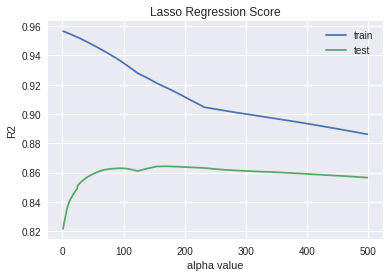

In [14]:
plt.plot(test_results_df.alpha, test_results_df.train_score, label='train')
plt.plot(test_results_df.alpha, test_results_df.test_score, label='test')
plt.title('Lasso Regression Score')
plt.ylabel('R2')
plt.xlabel('alpha value')
plt.legend()

### Support Vector Regression

In [15]:
test_results = []
c_values = range(1,400,20)
for c in tqdm(c_values):
    model = SVR(kernel ='linear', C=c)
    test_result = run_model(model,
                            'SVR',
                            train_data, 
                            train_labels,
                           test_data,
                           test_labels)
    test_results.append(test_result)

100%|██████████| 20/20 [01:45<00:00,  5.28s/it]


In [16]:
test_results_df = pd.DataFrame(test_results)
test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)

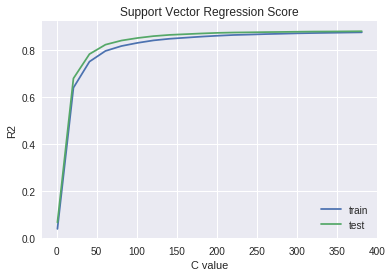

In [17]:
plt.plot(test_results_df.C, test_results_df.train_score, label='train')
plt.plot(test_results_df.C, test_results_df.test_score, label='test')
plt.title('Support Vector Regression Score')
plt.ylabel('R2')
plt.xlabel('C value')
plt.legend()